# COVID-19 Symptoms analysis using Reinforcement Learning

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("Cleaned-Data.csv")
dataset = dataset.iloc[:,:11]

## Implementing UCB

In [3]:
import math
N = len(dataset)
d = len(dataset.columns)
attribute_selacted = []
numbers_of_selection = [0] * d
sums_of_rewards = [0] * d
total_rewaard = 0

for n in range(N):
  attribute = 0
  max_upper_bound = 0
  for i in range(d):
    if (numbers_of_selection[i] > 0):
      average_reward = sums_of_rewards[i]/numbers_of_selection[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1)/numbers_of_selection[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      attribute = i
  attribute_selacted.append(attribute)
  numbers_of_selection[attribute] += 1
  reward = dataset.values[n, attribute]
  sums_of_rewards[attribute] +=  reward
  total_rewaard += reward

## Visualising the results

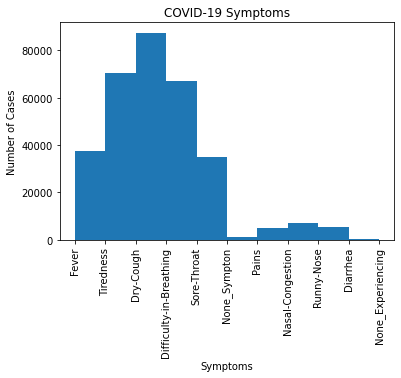

In [4]:
plt.hist(attribute_selacted)
plt.xticks(range(len(list(dataset.columns))),list(dataset.columns), rotation=90)
plt.title('COVID-19 Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Number of Cases')
plt.savefig("COVID-19 Symptoms.png",dpi=300, bbox_inches='tight')
plt.show()

# Conclusion

In this Analysis, I have used the dataset of COVID-19 3.1L Patient's Symptoms and conclude the following;

1. in 85k patient major Symptom is Dry-Cough
2. in 70k patient second major Symptom is Tiredness
3. in 68k patient third major Symptom is Difficulty in Breathing
4. 39k patient is having Fever
5. 38k patient does not have any Symptom as per the Reinforcement Learning model

Disclaimer: All the analysis is based on the dataset provided by the World Health Organization (WHO) and processed by Bilal H. Hungund K.
(https://www.kaggle.com/iamhungundji/covid19-symptoms-checker)